In [61]:
import numpy as np
import pandas as pd 
import seaborn as sns
from ggplot import *

weather = pd.read_csv("\Users\praga\Downloads\weatherHistory.csv")

print("\n\nWeather Dataframe" + "-"*13)
print(weather.sample(8))



C:\Users\praga\Anaconda2\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
C:\Users\praga\Anaconda2\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
C:\Users\praga\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools




Weather Dataframe-------------
                      Formatted Date        Summary Precip Type  \
31361  2009-06-07 17:00:00.000 +0200  Mostly Cloudy        rain   
31455  2009-03-10 15:00:00.000 +0100  Partly Cloudy        rain   
69122  2013-10-26 03:00:00.000 +0200          Foggy        rain   
62238  2013-08-14 06:00:00.000 +0200  Mostly Cloudy        rain   
14660  2007-05-10 21:00:00.000 +0200  Partly Cloudy        rain   
12689  2007-07-02 17:00:00.000 +0200  Mostly Cloudy        rain   
12218  2007-01-30 02:00:00.000 +0100  Mostly Cloudy        rain   
77946  2014-10-28 21:00:00.000 +0100  Mostly Cloudy        rain   

       Temperature (C)  Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
31361        27.811111                 27.088889      0.33            14.7959   
31455        10.000000                  6.661111      0.50            28.9800   
69122         9.466667                  9.466667      0.96             3.3649   
62238        18.772222                 

In [62]:
print("Weather size" + "-"*5)
print(weather.shape)


Weather size-----
(96453, 12)


It has 96453 rows and 12 columns.

In [63]:
weather_null=weather.isnull().sum()
weather_null[weather_null>0]

Precip Type    517
dtype: int64

The columns Precip Type has 517 NaN values.

### Types of Variables

Continuous - These are numeric variables that can take any value, including decimals. 

Count - These are numeric variables that can only take positive integer values.

Categorical - These are not numbers. Categorical variables tell you whether or not an observation is part of a specific group. 

In [64]:
weather.dtypes

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

Among the 12 columns, we have to figure out which is continuous , categorical and Count.

From the documentation of the datset, we find that Precipe type, Summary and Daily Summary are Categorical type.

The rest of the columns are of Continuous type.


In [65]:
weather['Precip Type'].value_counts()

rain    85224
snow    10712
Name: Precip Type, dtype: int64

In [372]:
weather['Summary'].value_counts()

Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Windy and Mostly Cloudy                   35
Breezy and Foggy                          35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

So, in this dataset, Temperature (C) is a continuous variable. It's a number that can have decimal values.

I'm interested in predicting the temperature based on the humidity. To do this, I plot the Temperature and Humidity graph to find the relation between them.

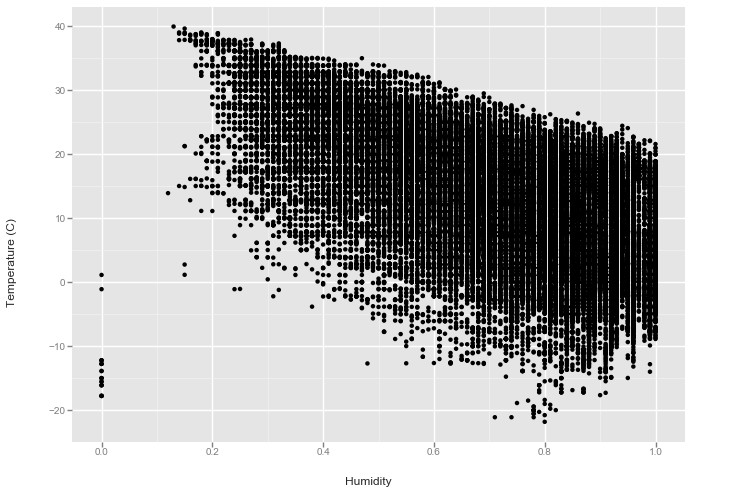

<ggplot: (200983356)>

In [373]:
ggplot(weather, aes(y='Temperature (C)', x='Humidity')) + geom_point()

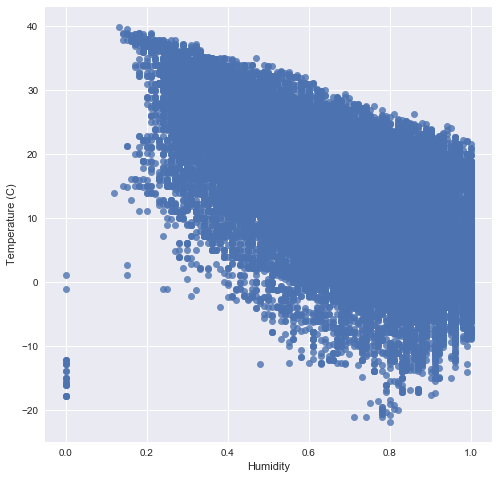

In [374]:
sns.set(style="darkgrid")

g = sns.regplot(y='Temperature (C)', x='Humidity', data=weather, fit_reg=False)
   
g.figure.set_size_inches(8, 8)

In [393]:
import pandas as pd
import numpy as np

from ggplot.geoms.geom import geom
from ggplot.stats import smoothers
from ggplot.utils import is_date

class stat_smooth(geom):
    """
    Smoothed line charts for inspecting trends in your data. There are 3 types of
    smoothing algorithms you can use:
        LOESS ('loess', 'lowess'): Non-parmetric, local regression technique for
            calculating a smoothed curve.
        linear model ('lm'): Fits a linear model to your (x, y) coordinates
        moving average ('ma'): Calculates average of last N points in (x, y) coordinates
    In addition to plotting the smoothed line, stat_smooth will also display the
    standard error bands of the smoothed data (controlled by se=True/False).
    Parameters
    ----------
    x:
        x values for (x, y) coordinates
    y:
        y values for (x, y) coordinates. these will ultimately be smoothed
    color:
        color of the outer line
    alpha:
        transparency of color
    size:
        thickness of line
    linetype:
        type of the line ('solid', 'dashed', 'dashdot', 'dotted')
    se:
        boolean value for whether or not to display standard error bands; defaults to True
    method:
        type of smoothing to ues ('loess', 'ma', 'lm')
    window:
        number of periods to include in moving average calculation
    Examples
    --------
    """

    DEFAULT_AES = {'color': 'black'}
    DEFAULT_PARAMS = {'geom': 'smooth', 'position': 'identity', 'method': 'auto',
            'se': True, 'n': 80, 'fullrange': False, 'level': 0.95,
            'span': 2/3., 'window': None}
    REQUIRED_AES = {'x', 'y'}
    _aes_renames = {'size': 'linewidth', 'linetype': 'linestyle'}

    def plot(self, ax, data, _aes):
        (data, _aes) = self._update_data(data, _aes)
        variables = _aes.data
        data = data[list(variables.values())]
        data = data.dropna()
        x = data[variables['x']]
        y = data[variables['y']]

        params = {'alpha': 0.2}

        se = self.params.get('se', True)
        method = self.params.get('method', 'lm')
        level = self.params.get('level', 0.95)
        window = self.params.get('window', None)
        span = self.params.get('span', 2/3.)

        if method == "lm":
            x, y, y1, y2 = smoothers.lm(x, y, 1-level)
        elif method == "ma":
            x, y, y1, y2 = smoothers.mavg(x, y, window=window)
        else:
            x, y, y1, y2 = smoothers.lowess(x, y, span=span)

        smoothed_data = pd.DataFrame(dict(x=x, y=y, y1=y1, y2=y2))
        try:  # change in Pandas-0.19
            smoothed_data = smoothed_data.sort_values(by='x')
        except:  # before Pandas-0.19
            smoothed_data = smoothed_data.sort('x')

        params = self._get_plot_args(data, _aes)
        if 'alpha' not in params:
            params['alpha'] = 0.2

        #order = np.argsort(x)
        if self.params.get('se', True)==True:
            if is_date(smoothed_data.x.iloc[0]):
                dtype = smoothed_data.x.iloc[0].__class__
                x = np.array([i.toordinal() for i in smoothed_data.x])
                ax.fill_between(x, smoothed_data.y1, smoothed_data.y2, **params)
                new_ticks = [dtype(i) for i in ax.get_xticks()]
                ax.set_xticklabels(new_ticks)
            else:
                ax.fill_between(smoothed_data.x, smoothed_data.y1, smoothed_data.y2, **params)
        if self.params.get('fit', True)==True:
            del params['alpha']
            ax.plot(smoothed_data.x, smoothed_data.y, **params)

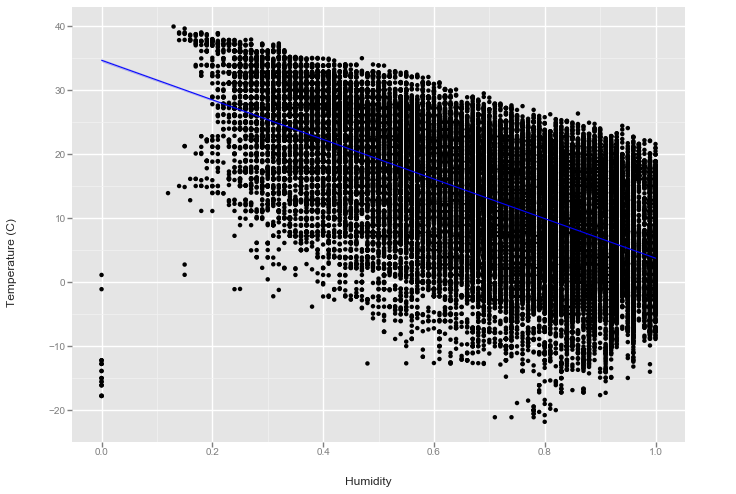

<ggplot: (352153825)>

In [394]:
ggplot(weather, aes(y='Temperature (C)', x='Humidity')) + geom_point() + stat_smooth(method="lm", color='blue')

That blue line is a regression model. Looking at the regression line, we can tell that as humidity increases, it's more likely that that temperature decreases. We can tell this because the line moves towards 1.0, which means high humidity and low temperature.

Looking at the graph, we can tell that we're pretty sure about our prediction when the humidity is lower (towards the left side of the graph), but as we move to the right we get less certain and we have more error.

# Linear regression

In [66]:
humid_array= np.array(weather['Humidity'])
humid_array

array([0.89, 0.86, 0.89, ..., 0.56, 0.6 , 0.61])

In [67]:
humid_array= np.array(weather['Humidity']).reshape(len(weather), 1)
humid_array

array([[0.89],
       [0.86],
       [0.89],
       ...,
       [0.56],
       [0.6 ],
       [0.61]])

In [68]:
import statsmodels.api as sm

X = inputs = humid_array
Y = outputs = weather["Temperature (C)"]
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

model.summary()
# we are predicting the value without the use of a constant.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Temperature (C)   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                 7.167e+04
Date:                Thu, 31 May 2018   Prob (F-statistic):               0.00
Time:                        11:04:37   Log-Likelihood:            -3.7308e+05
No. Observations:               96453   AIC:                         7.462e+05
Df Residuals:                   96452   BIC:                         7.462e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            13.1230      0.049    267.706      0.000      13.027      13.219
==============================================================================
Omnibus:                     3357.004   Durbin-Watson:                   0.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2547.995
Skew:                           0.308   Prob(JB):                         0.00
Kurtosis:                       2.495   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The coefficient of 0.0006 means that as the humidity variable increases by 1, the predicted value of Temperature increases by 13.123.

A few other important values are the R-squared — the percentage of variance our model explains; the standard error (is the standard deviation of the sampling distribution of a statistic, most commonly of the mean); the t scores and p-values, for hypothesis test — the x1 has statistically significant p-value; there is a 95% confidence intervals for the x1 (meaning we predict at a 95% percent confidence that the value of x1 is between13.027 to 13.219).

In [69]:
import statsmodels.api as sm
#now we are predicting the humidity value with a constant in the linear equation.
X = inputs = humid_array
Y = outputs = weather["Temperature (C)"]
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Temperature (C)   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                 6.423e+04
Date:                Thu, 31 May 2018   Prob (F-statistic):               0.00
Time:                        11:04:40   Log-Likelihood:            -3.2991e+05
No. Observations:               96453   AIC:                         6.598e+05
Df Residuals:                   96451   BIC:                         6.598e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.6369      0.093    373.651      0.000      34.455      34.819
x1           -30.8944      0.122   -253.442      0.000     -31.133     -30.655
==============================================================================
Omnibus:                     2385.781   Durbin-Watson:                   0.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2566.298
Skew:                          -0.394   Prob(JB):                         0.00
Kurtosis:                       3.131   Cond. No.                         7.95
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0,0.5,u'Temperature (C)')

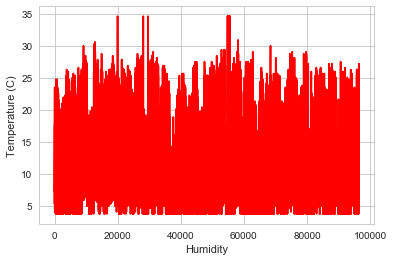

In [77]:
plt.plot(y1,c='red')
plt.xlabel("Humidity")
plt.ylabel("Temperature (C)")
#plot with constant and coefficient

Text(0,0.5,u'Temperature (C)')

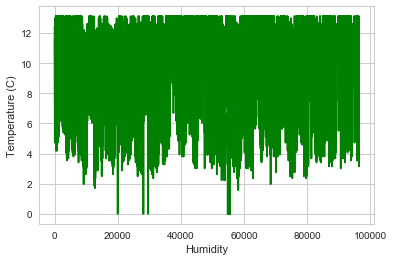

In [79]:
plt.plot(y2, c='green')
plt.xlabel("Humidity")
plt.ylabel("Temperature (C)")
#plot with only constant

Text(0,0.5,u'Temperature (C)')

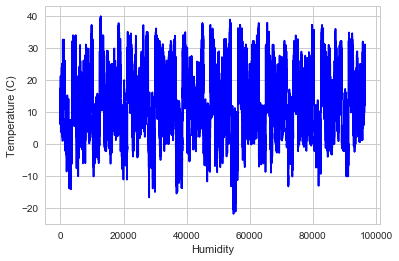

In [72]:
plt.plot(Y, c='blue')
plt.xlabel("Humidity")
plt.ylabel("Temperature (C)")

Text(0,0.5,u'Temperature (C)')

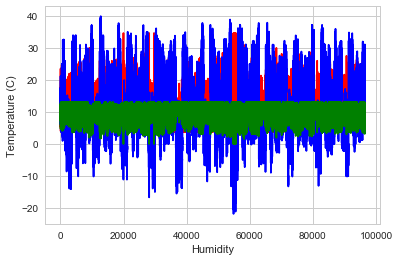

In [71]:
import matplotlib.pyplot as plt
y1=34.6369-(30.8944*humid_array)
y2=13.120*humid_array
plt.plot(y1,c='red')
plt.plot(Y, c='blue')
plt.plot(y2, c='green')
plt.xlabel("Humidity")
plt.ylabel("Temperature (C)")


We can see when we overlap the plots, the predictions of Temperature are more close to the actual values of the Temperature when we use constant also in the linear regression line.

We just used one variable, Humidity to predict the Temperature. Lets use more variables to get a more accurate prediction of temperature.


# Multiple Regression

In [384]:
weather=weather.select_dtypes(include=['int','float'])
# we take only the columns which have integer and decimal values to predict temperature in linear regression.

In [385]:
#Check for null values
weather.isnull().sum()

Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
dtype: int64

Text(0.5,0,u'Features')

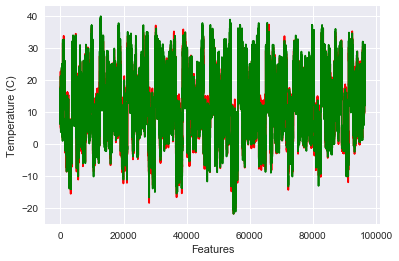

In [386]:
X=weather.drop('Temperature (C)', axis=1)
Y=weather['Temperature (C)']
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,Y)
Y_pred = reg.predict(X)
residual = Y - Y_pred
plt.plot(Y_pred,c='red')
plt.plot(Y,c='green')
plt.ylabel("Temperature (C)")
plt.xlabel("Features")


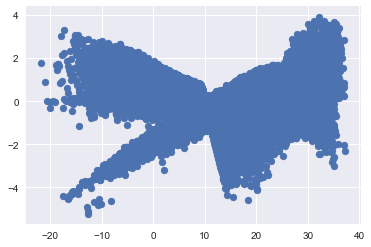

In [387]:
plt.scatter(Y_pred,residual)

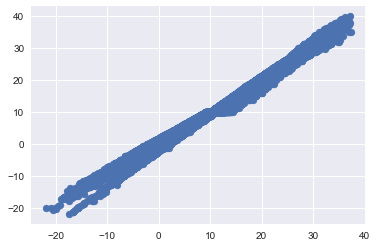

In [388]:
plt.scatter(Y_pred,Y)

In [389]:
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(Y,Y_pred))
rmse
#Root mean square error

0.9489993811324642

We have low rmse, which means the model is good.

In [390]:
X=weather.drop('Temperature (C)', axis=1)
Y=weather['Temperature (C)']
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Temperature (C)   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 1.612e+06
Date:                Wed, 30 May 2018   Prob (F-statistic):               0.00
Time:                        16:49:13   Log-Likelihood:            -1.3181e+05
No. Observations:               96453   AIC:                         2.636e+05
Df Residuals:                   96446   BIC:                         2.637e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        2.8408      0.035     81.988      0.000       2.773       2.909
Apparent Temperature (C)     0.8725      0.000   2295.962      0.000       0.872       0.873
Humidity                    -1.4240      0.021    -67.763      0.000      -1.465      -1.383
Wind Speed (km/h)            0.0798      0.000    168.462      0.000       0.079       0.081
Wind Bearing (degrees)      -0.0004   2.87e-05    -14.110      0.000      -0.000      -0.000
Visibility (km)              0.0084      0.001     10.357      0.000       0.007       0.010
Loud Cover                        0          0        nan        nan           0           0
Pressure (millibars)        -0.0002   2.62e-05     -7.793      0.000      -0.000      -0.000
==============================================================================
Omnibus:                     3699.742   Durbin-Watson:                   0.426
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4456.312
Skew:                          -0.445   Prob(JB):                         0.00
Kurtosis:                       3.563   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

We are getting high R squared value, close to 1, which means these variables explain most of the target variable.

# Elastic Net 

 The elastic net is a regularized regression method that linearly combines the L1 and L2 penalties of the lasso and ridge methods.

In [391]:
from sklearn.linear_model import ElasticNetCV
regr = ElasticNetCV(cv=10, random_state=0)
regr.fit(X, Y)

ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=1,
       normalize=False, positive=False, precompute='auto', random_state=0,
       selection='cyclic', tol=0.0001, verbose=0)

In [392]:
print(regr.intercept_)

1.5276691988676436


In [283]:
coefficients = pd.DataFrame()
coefficients['columns'] = X.columns
coefficients['coef'] = regr.coef_
print(coefficients)

                    columns      coef
0                     const  0.000000
1  Apparent Temperature (C)  0.886156
2                  Humidity -0.000000
3         Wind Speed (km/h)  0.087613
4    Wind Bearing (degrees) -0.000498
5           Visibility (km)  0.012488
6                Loud Cover  0.000000
7      Pressure (millibars) -0.000197


In [284]:
variables_non_zero = coefficients[coefficients['coef'] != 0]['columns']
print(variables_non_zero)

1    Apparent Temperature (C)
3           Wind Speed (km/h)
4      Wind Bearing (degrees)
5             Visibility (km)
7        Pressure (millibars)
Name: columns, dtype: object


We will take these columns and use them for the linear regression curve.

In [290]:
X_new = weather[variables_non_zero]
Y_new=weather['Temperature (C)']

from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_new, Y_new)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

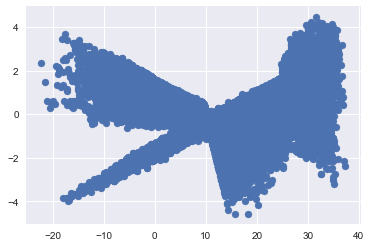

In [291]:
Y_pred_new = regr.predict(X_new)
residual_new = Y_new - Y_pred_new
plt.scatter(Y_pred_new,residual_new)

Since the points in a residual plot are randomly dispersed around the horizontal axis, a linear regression model is appropriate for the data

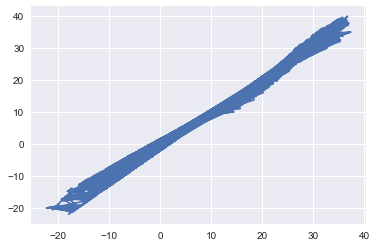

In [448]:
plt.plot(Y_pred_new,Y_new)
#new plot after using elastic net

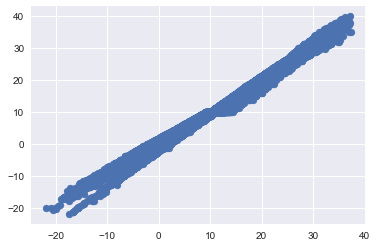

In [450]:
plt.scatter(Y_pred,Y)
#old plot before using elastic net

If we compare the new plot to the previous plot, the new plot is much more refined and cleaner.

Lets take a look at a dataset with more number of columns.

In [82]:
bottle=pd.read_csv("/Users/praga/Downloads/bottle.csv",low_memory=False)
bottle.sample(10)

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
623244,25445,623245,093.3 090.0,19-8808NM-HY-224-2047-09330900-0072A-3,72,14.190,33.2130,6.020,24.77000,103.00,...,0.11,72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
176568,6818,176569,130.0 150.0,19-5404SB-HY-124-0512-13001500-0125A-7,125,13.210,33.5070,NaN,25.19900,NaN,...,NaN,125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
609178,24902,609179,052.7 061.0,19-8705NM-CT-126-2216-05270610-0090A-5,90,10.670,32.8610,NaN,25.17000,NaN,...,NaN,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
400803,15031,400804,093.3 110.0,19-6612JD-HY-338-0200-09331100-0120A-3,120,10.620,33.4450,4.590,25.63500,72.90,...,NaN,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
776125,31018,776126,093.3 120.0,20-0511NM-MX-311-2358-09331200-0200A-7,200,9.400,33.7490,3.720,26.07800,57.60,...,NaN,201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
404759,15213,404760,113.3 060.0,19-6707EB-HY-193-1730-11330600-0400A-7,400,7.540,34.3730,0.520,26.85500,7.70,...,NaN,402,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
603573,24678,603574,093.3 050.0,19-8703JD-HY-062-2349-09330500-0051A-3,51,14.200,33.4040,6.060,24.91400,103.80,...,0.41,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
842063,33515,842064,093.3 050.0,20-14025S-MX-030-1034-09330500-0140A-3,140,9.406,33.8564,2.794,26.16284,43.31,...,0.03,141,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
577628,23604,577629,070.0 080.0,19-8407JD-HY-206-0320-07000800-0020A-3,20,15.740,32.9000,5.930,24.19300,104.50,...,0.02,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
841469,33492,841470,086.7 040.0,20-14025S-MX-036-0601-08670400-0075A-7,75,11.781,33.4370,4.595,25.42033,74.83,...,0.17,76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
bottle.columns

Index([u'Cst_Cnt', u'Btl_Cnt', u'Sta_ID', u'Depth_ID', u'Depthm', u'T_degC',
       u'Salnty', u'O2ml_L', u'STheta', u'O2Sat', u'Oxy_µmol/Kg', u'BtlNum',
       u'RecInd', u'T_prec', u'T_qual', u'S_prec', u'S_qual', u'P_qual',
       u'O_qual', u'SThtaq', u'O2Satq', u'ChlorA', u'Chlqua', u'Phaeop',
       u'Phaqua', u'PO4uM', u'PO4q', u'SiO3uM', u'SiO3qu', u'NO2uM', u'NO2q',
       u'NO3uM', u'NO3q', u'NH3uM', u'NH3q', u'C14As1', u'C14A1p', u'C14A1q',
       u'C14As2', u'C14A2p', u'C14A2q', u'DarkAs', u'DarkAp', u'DarkAq',
       u'MeanAs', u'MeanAp', u'MeanAq', u'IncTim', u'LightP', u'R_Depth',
       u'R_TEMP', u'R_POTEMP', u'R_SALINITY', u'R_SIGMA', u'R_SVA', u'R_DYNHT',
       u'R_O2', u'R_O2Sat', u'R_SIO3', u'R_PO4', u'R_NO3', u'R_NO2', u'R_NH4',
       u'R_CHLA', u'R_PHAEO', u'R_PRES', u'R_SAMP', u'DIC1', u'DIC2', u'TA1',
       u'TA2', u'pH2', u'pH1', u'DIC Quality Comment'],
      dtype='object')

We have 74 columns and we have to figure out which columns are useful in predicting the practical salinity of water, ie the ['Salnty'] column.

In [84]:
bottle_null=bottle.isnull().sum()
bottle_null[bottle_null>0]

T_degC                  10963
Salnty                  47354
O2ml_L                 168662
STheta                  52689
O2Sat                  203589
Oxy_µmol/Kg            203595
BtlNum                 746196
T_prec                  10963
T_qual                 841736
S_prec                  47354
S_qual                 789949
P_qual                 191108
O_qual                 680187
SThtaq                 799040
O2Satq                 647066
ChlorA                 639591
Chlqua                 225697
Phaeop                 639592
Phaqua                 225693
PO4uM                  451546
PO4q                   413077
SiO3uM                 510772
SiO3qu                 353997
NO2uM                  527287
NO2q                   335389
NO3uM                  527460
NO3q                   334930
NH3uM                  799901
NH3q                    56564
C14As1                 850431
                        ...  
DarkAp                 844406
DarkAq                  24423
MeanAs    

In [85]:
bottle=bottle.select_dtypes(include=['int','float'])
bottle=bottle.fillna(0)

In [86]:
x=bottle.drop('Salnty', axis=1)
y=bottle['Salnty']
from sklearn import linear_model
regr = ElasticNetCV(cv=5, random_state=0,max_iter=10000)

regr.fit(x,y)

ElasticNetCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=10000, n_alphas=100, n_jobs=1,
       normalize=False, positive=False, precompute='auto', random_state=0,
       selection='cyclic', tol=0.0001, verbose=0)

In [87]:
print(regr.intercept_)


0.3503784458915433


In [90]:
coeff= pd.DataFrame()
coeff['columns'] = x.columns
coeff['coef'] = regr.coef_
print(coeff)

        columns      coef
0        T_degC -0.000000
1        O2ml_L -0.000000
2        STheta  0.027802
3         O2Sat -0.000000
4   Oxy_µmol/Kg -0.000088
5        BtlNum  0.000000
6        T_prec -0.000000
7        T_qual  0.000000
8        S_prec  0.000000
9        S_qual -0.000000
10       P_qual -0.000000
11       O_qual -0.000000
12       SThtaq -0.000000
13       O2Satq -0.000000
14       ChlorA -0.000000
15       Chlqua  0.000000
16       Phaeop -0.000000
17       Phaqua  0.000000
18        PO4uM  0.000000
19         PO4q  0.000000
20       SiO3uM  0.000000
21       SiO3qu -0.000000
22        NO2uM -0.000000
23         NO2q -0.000000
24        NO3uM  0.000000
25         NO3q -0.000000
26        NH3uM -0.000000
27         NH3q -0.000000
28       C14As1 -0.000000
29       C14A1p -0.000000
..          ...       ...
34       DarkAs -0.000000
35       DarkAp -0.000000
36       DarkAq  0.000000
37       MeanAs -0.000000
38       MeanAp -0.000000
39       MeanAq  0.000000
40       Lig

In [89]:
non_zero=coeff[coeff['coef'] != 0]['columns']
non_zero

2          STheta
4     Oxy_µmol/Kg
41        R_Depth
44     R_SALINITY
45        R_SIGMA
46          R_SVA
57         R_SAMP
Name: columns, dtype: object

In this way we can use Elastic Net to find the columns in a dataframe which are essential to predict a variable's value.

Incase of more number of columns, we use MultiTaskElasticNetCV.

# Logistic Regression

Logistic regression is a statistical method for analyzing a dataset in which there are one or more independent variables that determine an outcome. The outcome is measured with a dichotomous variable (in which there are only two possible outcomes).

In [20]:
from sklearn import preprocessing
import matplotlib.pyplot as plt 
import pandas as pd
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

The data is related with direct marketing campaigns of a  banking institution. The classification goal is to predict if the client will subscribe (1/0) a term deposit (variable y).

It includes 41188 records and 21 fields.

In [96]:
data=pd.read_csv("/Users/praga/Downloads/banking.csv")
print(data.sample(10))
print"Columns --- ", data.columns

       age            job   marital          education  default housing loan  \
12204   52  self-employed   married  university.degree       no     yes   no   
21885   89        retired  divorced           basic.4y       no     yes   no   
27438   41         admin.    single  university.degree       no      no   no   
20422   48       services  divorced        high.school       no     yes   no   
7043    48     management   married  university.degree       no     yes   no   
21950   46         admin.    single  university.degree       no      no   no   
21629   25        student    single  university.degree       no      no   no   
14365   53        unknown   married           basic.4y  unknown      no   no   
32764   32       services    single           basic.9y       no      no  yes   
22503   36         admin.   married  university.degree       no     yes   no   

         contact month day_of_week ...  campaign  pdays  previous  \
12204  telephone   may         fri ...         4  

In [97]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [98]:
data['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

Lets combine basic.9y,  basic.4y, basic.6y and combine them into a value called as Basic in the education column,.

In [99]:
data['education']=np.where(data['education'] =='basic.9y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.6y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.4y', 'Basic', data['education'])

In [100]:
data['education'].value_counts()

Basic                  12513
university.degree      12168
high.school             9515
professional.course     5243
unknown                 1731
illiterate                18
Name: education, dtype: int64

## Data Exploration

In [101]:
data['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

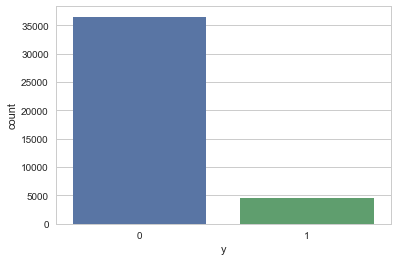

In [102]:
sns.countplot(x='y',data=data)
plt.show()

There are 36548 no's and 4640 yes's in the outcome variables.

Let's get a sense of the numbers across the two classes

In [103]:
data.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


The average age of customers who bought the term deposit is higher than that of the customers who didn't. The pdays (days since the customer was last contacted) is understandably lower for the customers who bought it. The lower the pdays, the better the memory of the last call and hence the better chances of a sale. Surprisingly, campaigns (number of contacts or calls made during the current campaign) are lower for customers who bought the term deposit.

We can calculate categorical means for other categorical variables such as education and marital status to get a more detailed sense of our data.

In [104]:
data.groupby('job').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.129726
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286


In [105]:
data.groupby('marital').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,,
divorced,44.899393,253.790330,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643,0.103209
married,42.307165,257.438623,2.57281,967.247673,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772,0.101573
single,33.158714,261.524378,2.53380,949.909578,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265,0.140041
unknown,40.275000,312.725000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313038,5157.393750,0.150000


In [106]:
data.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,,
Basic,42.163910,263.043874,2.559498,974.877967,0.141053,0.191329,93.639933,-40.927595,3.729654,5172.014113,0.087029
high.school,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.108355
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
professional.course,40.080107,252.533855,2.586115,960.765974,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979,0.113485
university.degree,38.879191,253.223373,2.563527,951.807692,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298,0.137245
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509,0.145003


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

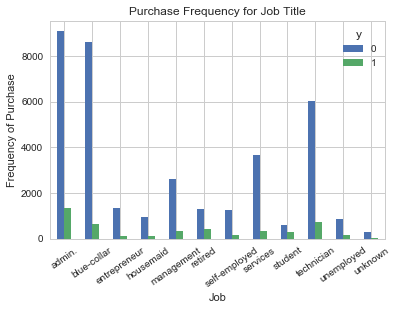

In [107]:
pd.crosstab(data.job,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.xticks(rotation=35)

 The job title can be a good predictor of the outcome variable.

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

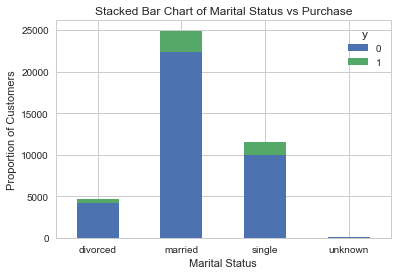

In [108]:
pd.crosstab(data.marital,data.y).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.xticks(rotation=0)

The marital status does not seem a strong predictor for the outcome variable.

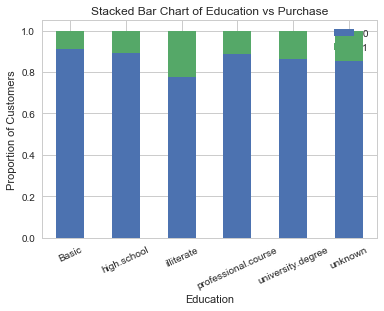

In [109]:
table=pd.crosstab(data.education,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.xticks(rotation=25)
plt.legend(loc='best')


Education seems a good predictor of the outcome variable.

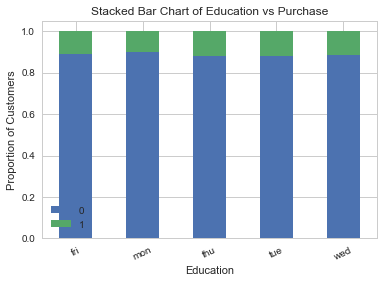

In [110]:
table=pd.crosstab(data.day_of_week,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.xticks(rotation=25)
plt.legend(loc='best')


Day of week may not be a good predictor of the outcome

Text(0,0.5,u'Frequency of Purchase')

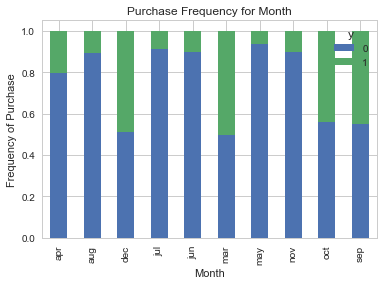

In [111]:
table=pd.crosstab(data.month,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')


Month might be a good predictor of the outcome variable

Text(0,0.5,u'Frequency of Purchase')

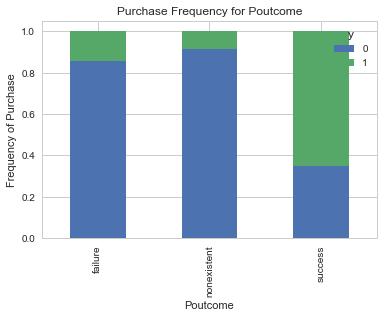

In [112]:
table=pd.crosstab(data.poutcome,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')


Poutcome seems to be a good predictor of the outcome variable.

## Create dummy variables

In [113]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1

In [114]:
data.sample(6)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
23526,34,technician,married,professional.course,no,yes,no,cellular,jul,wed,...,0,0,0,0,0,0,1,0,1,0
34849,39,management,single,high.school,unknown,no,no,telephone,nov,tue,...,0,0,0,0,0,1,0,0,1,0
34241,37,services,single,high.school,no,yes,no,cellular,jul,wed,...,0,0,0,0,0,0,1,0,1,0
19106,50,admin.,married,high.school,no,no,no,cellular,aug,tue,...,0,0,0,0,0,1,0,0,1,0
33457,25,self-employed,single,university.degree,no,no,no,telephone,may,tue,...,0,0,0,0,0,1,0,0,1,0
7018,29,blue-collar,married,Basic,no,no,no,telephone,jun,mon,...,0,0,0,1,0,0,0,0,1,0


In [115]:
data_vars=data.columns #there are 72 columns
to_keep=[i for i in data_vars if i not in cat_vars] #there are 62 columns here


This keeps only the columns in the dataframe which are useful in preciting vallue of variable y. It removes the columns which are present in cat_vars.

In [116]:
data_final=data[to_keep]
data_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',

In [117]:
y=data_final['y']
x=data_final.drop(['y'],axis=1)


## Feature Selection

We can use Elastic Nets to perform feature selection.

In [118]:
from sklearn.linear_model import ElasticNetCV
regr = ElasticNetCV(cv=10, random_state=0)
regr.fit(x, y)
coefficients = pd.DataFrame()
coefficients['columns'] = x.columns
coefficients['coef'] = regr.coef_
print(coefficients[coefficients>0.3 ]['columns'])

0                               age
1                          duration
2                          campaign
3                             pdays
4                          previous
5                      emp_var_rate
6                    cons_price_idx
7                     cons_conf_idx
8                         euribor3m
9                       nr_employed
10                       job_admin.
11                  job_blue-collar
12                 job_entrepreneur
13                    job_housemaid
14                   job_management
15                      job_retired
16                job_self-employed
17                     job_services
18                      job_student
19                   job_technician
20                   job_unemployed
21                      job_unknown
22                 marital_divorced
23                  marital_married
24                   marital_single
25                  marital_unknown
26                  education_Basic
27            education_high

Elastic nets doesnt help much here as it still gives us 61 columns to work, reducing from 62 columns. Lets try a different approach.

### Recursive Feature Elimination 

The goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

In [122]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(logreg ,18) #we want 18 columns to work with.
rfe = rfe.fit(x, y )
print(rfe.support_)
print(rfe.ranking_)

[False False False False  True False False False  True False False  True
 False False False  True False  True  True False False False False False
 False False False False False False False False  True False False False
 False False False False False False  True  True  True False False False
  True  True  True False False False  True False False  True  True  True
  True]
[35 33 12 42  1 17 22 20  1 31 11  1 30 41 38  1 28  1  1 21 26 40  2  3
  4 43  6  7 39  8 10 16  1 19 44 36 15 37 13 18 14 27  1  1  1 25 23 24
  1  1  1 32  5  9  1 34 29  1  1  1  1]


The Recursive Feature Elimination (or RFE) works by recursively removing attributes and building a model on those attributes that remain.

It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.

The Recursive Feature Elimination (RFE) has helped us select the following features: "previous", "euribor3m", "job_blue-collar", "job_retired", "job_services", "job_student", "default_no", "month_aug", "month_dec", "month_jul", "month_nov", "month_oct", "month_sep", "day_of_week_fri", "day_of_week_wed", "poutcome_failure", "poutcome_nonexistent", "poutcome_success".

In [47]:
cols=["previous", "euribor3m", "job_blue-collar", "job_retired", "job_services", "job_student", "default_no", 
      "month_aug", "month_dec", "month_jul", "month_nov", "month_oct", "month_sep", "day_of_week_fri", "day_of_week_wed", 
      "poutcome_failure", "poutcome_nonexistent", "poutcome_success"] 
x=data_final[cols]
y=data_final['y']

Bagged decision trees like Random Forest and Extra Trees can also be used to estimate the importance of features.

In [48]:
from sklearn.ensemble import ExtraTreesClassifier
y=data_final['y']
x=data_final.drop(['y'],axis=1)
model = ExtraTreesClassifier()
model.fit(x, y)
print(model.feature_importances_)

[7.42782939e-02 2.20907449e-01 5.48155767e-02 3.41694816e-02
 1.23995232e-02 2.04047258e-02 1.88579060e-02 2.31810398e-02
 8.45451345e-02 2.04147707e-02 1.38663353e-02 9.57137368e-03
 4.73777980e-03 3.56645521e-03 8.01977652e-03 7.46396748e-03
 5.29217980e-03 7.11445850e-03 5.09711786e-03 1.18546796e-02
 4.70499049e-03 2.33920351e-03 8.30160368e-03 1.28177329e-02
 1.12076278e-02 6.25545426e-04 7.14662814e-03 5.53862205e-03
 8.35625177e-03 1.35025387e-02 2.92726399e-04 9.24354793e-03
 1.38723532e-02 6.23676989e-03 5.58477992e-03 5.99969880e-03
 6.91256747e-09 1.73877247e-02 2.24150381e-03 1.62358230e-02
 1.15166176e-02 2.51926835e-03 1.17427385e-02 9.12414795e-03
 7.45133938e-03 4.72786817e-03 2.55225419e-03 1.18170457e-03
 2.58355616e-03 5.00807224e-03 6.35045788e-03 1.10932588e-02
 3.54027320e-03 6.16221132e-03 3.51857007e-03 1.32671993e-02
 1.38666368e-02 1.38370419e-02 1.31393881e-02 1.33587519e-02
 6.45217879e-03 6.90590611e-03 3.79068550e-02]


In [49]:
x.columns

Index([u'age', u'duration', u'campaign', u'pdays', u'previous',
       u'emp_var_rate', u'cons_price_idx', u'cons_conf_idx', u'euribor3m',
       u'nr_employed', u'job_admin.', u'job_blue-collar', u'job_entrepreneur',
       u'job_housemaid', u'job_management', u'job_retired',
       u'job_self-employed', u'job_services', u'job_student',
       u'job_technician', u'job_unemployed', u'job_unknown',
       u'marital_divorced', u'marital_married', u'marital_single',
       u'marital_unknown', u'education_basic.4y', u'education_basic.6y',
       u'education_basic.9y', u'education_high.school',
       u'education_illiterate', u'education_professional.course',
       u'education_university.degree', u'education_unknown', u'default_no',
       u'default_unknown', u'default_yes', u'housing_no', u'housing_unknown',
       u'housing_yes', u'loan_no', u'loan_unknown', u'loan_yes',
       u'contact_cellular', u'contact_telephone', u'month_apr', u'month_aug',
       u'month_dec', u'month_jul', u'mon

You can see that we are given an importance score for each attribute where the larger score the more important the attribute. 

In [50]:
from sklearn.decomposition import PCA
y=data_final['y']
x=data_final.drop(['y'],axis=1)
pca = PCA()
fit = pca.fit(x)
# summarize components
print("Explained Variance: %s") % fit.explained_variance_ratio_


Explained Variance: [6.26913722e-01 3.30899977e-01 4.08535605e-02 1.01354709e-03
 1.91216107e-04 6.95176453e-05 8.99374126e-06 4.52008351e-06
 4.22508948e-06 3.32038114e-06 2.91005006e-06 2.60391048e-06
 2.46039357e-06 2.43364592e-06 2.34739019e-06 2.09394056e-06
 1.99754292e-06 1.92890347e-06 1.83315185e-06 1.82303261e-06
 1.76650932e-06 1.34545338e-06 1.25471378e-06 1.19643538e-06
 1.08362713e-06 1.02359574e-06 7.58958813e-07 6.88202370e-07
 6.39305079e-07 6.31005361e-07 6.08729602e-07 5.02581707e-07
 4.38151788e-07 4.12626887e-07 3.96717698e-07 3.22830190e-07
 3.02638849e-07 2.47593772e-07 2.25198190e-07 2.22891869e-07
 1.75394319e-07 1.73050674e-07 1.42386565e-07 1.17565525e-07
 8.22926042e-08 7.67445480e-08 4.42368357e-08 4.16101101e-08
 2.38715995e-08 1.79044660e-08 4.63475699e-09 1.01466179e-09
 5.27542739e-33 5.27542739e-33 5.27542739e-33 5.27542739e-33
 5.27542739e-33 5.27542739e-33 5.27542739e-33 5.27542739e-33
 5.27542739e-33 5.27542739e-33 5.27542739e-33]


Principal Component Analysis (or PCA) uses linear algebra to transform the dataset into a compressed form.

The main use of PCA is to reduce the size of the feature space while retaining as much of the information as possible. A way too see how much information we retain is to look at the explained variance ratio of the principal components.

## Implementing the Logistic Regression model

In [51]:
x=data_final[cols]
y=data_final['y']
x.shape

(41188, 18)

In [52]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### Predicting the test set results and caculating the accuracy

In [53]:
y_pred = logreg.predict(X_test)

In [54]:
print('Accuracy of logistic regression classifier on test set: ',(logreg.score(X_test, y_test)))

('Accuracy of logistic regression classifier on test set: ', 0.9003803512179331)


#### Cross-Validation

In [55]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=5, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("5-fold cross validation average accuracy: %.3f" % (results.mean()))

5-fold cross validation average accuracy: 0.897


In [56]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=9)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.897


#### Confusion Matrix

In [57]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[10872   109]
 [ 1122   254]]


The result is telling us that we have 10872+254 correct predictions and 1122+109 incorrect predictions.



#### Compute precision, recall, F-measure and support


The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y_test.

In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.91      0.99      0.95     10981
          1       0.70      0.18      0.29      1376

avg / total       0.88      0.90      0.87     12357



Of the entire test set, 88% of the promoted term deposit were the term deposit that the customers liked. Of the entire test set, 90% of the customer's preferred term deposit were promoted.

### ROC Curve

ROC curves typically feature true positive rate on the Y axis, and false positive rate on the X axis. This means that the top left corner of the plot is the “ideal” point - a false positive rate of zero, and a true positive rate of one. This is not very realistic, but it does mean that a larger area under the curve (AUC) is usually better.

The “steepness” of ROC curves is also important, since it is ideal to maximize the true positive rate while minimizing the false positive rate.

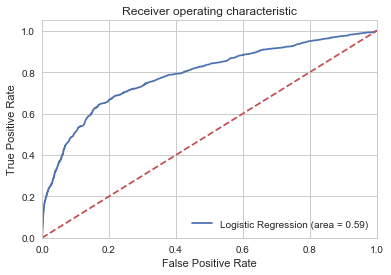

In [59]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()